In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt


In [ ]:
data_complete = pd.read_csv("/content/Continuous_Pathway_I_VAE_dataset1.csv")
data = data_complete.drop('Product_I', axis=1)
data = data.drop('Unnamed: 0', axis=1)
data_matrix = data.values


In [ ]:
num_components = 11  # Define the number of components for PPCA

In [ ]:
# Apply PCA to compute PPCA parameters
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(data_matrix)

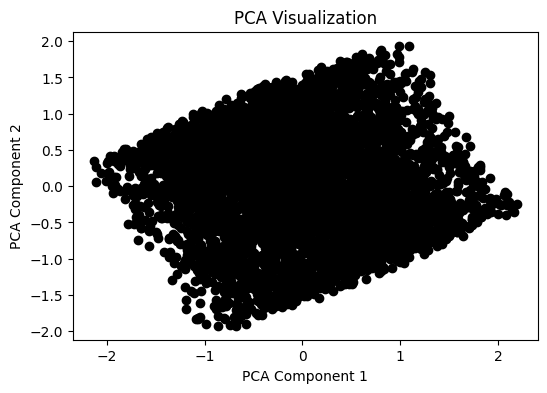

In [ ]:
feature_1 = 0
feature_2 = 1

plt.figure(figsize=(6,4))
plt.scatter(reduced_data[:,feature_1], reduced_data[:,feature_2], color='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')


plt.show()

In [ ]:
# Get PPCA parameters (mean, projection matrix, noise variance)
mean_of_data = np.mean(data_matrix, axis=0)  # Compute mean of the data
print(f"Mean of data: {mean_of_data}")

projection_matrix = pca.components_.T  # Transpose projection matrix from PCA for PPCA reconstruction
noise_variance = np.mean((data_matrix - np.dot(reduced_data, projection_matrix.T) - mean_of_data) ** 2)  # Estimate noise variance

print(f"Sigma^2: {noise_variance}")

Mean of data: [1.24068198 1.26159895 1.24820112 1.24615397 1.23848818 1.25093274
 1.24988737 1.25100547 1.26107394 1.63412777 1.04035297 1.0001083
 1.00512708 1.70500079 1.18558413 1.6756887  0.9996068  1.001823
 0.99874559]
Sigma^2: 0.02984011417185108


In [ ]:
# Generate random noise samples for reconstruction
num_samples_to_generate = data_matrix.shape[0]  # Number of samples in the dataset
noise_samples = np.random.normal(scale=np.sqrt(noise_variance), size=data_matrix.shape)

# Reconstruct the data using PPCA parameters and noise
synthetic_samples = np.dot(reduced_data, projection_matrix.T) + mean_of_data + noise_samples

print(f"Mean of synthetic date: {np.mean(synthetic_samples, axis=0)}")



Mean of synthetic date: [1.24314823 1.26040143 1.24885463 1.24736989 1.23848515 1.24997078
 1.24790197 1.25071586 1.26000879 1.63689592 1.03811022 0.99757605
 1.00997687 1.70920786 1.18717666 1.67073728 1.0005288  1.00165097
 1.00055379]


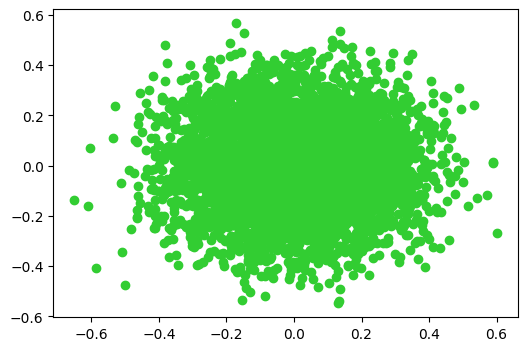

In [ ]:
feature_1 = 0
feature_2 = 1
plt.figure(figsize=(6,4))
plt.scatter(noise_samples[:,0], noise_samples[:,1], color='limegreen')
plt.show()

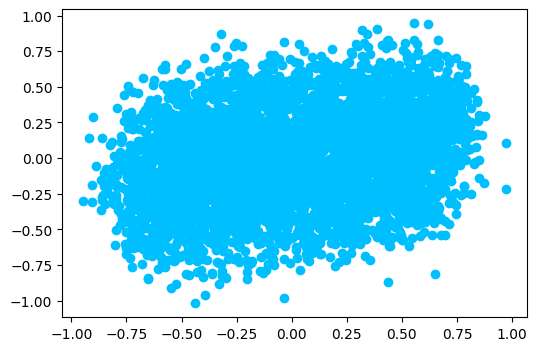

In [ ]:
v_matrix = np.dot(reduced_data, projection_matrix.T)

feature_1 = 0
feature_2 = 1
plt.figure(figsize=(6,4))
plt.scatter(v_matrix[:,0], v_matrix[:,1], color='deepskyblue')


plt.show()

In [ ]:
# Calculate reconstruction error (mean squared error)
reconstruction_error = mean_squared_error(data_matrix, synthetic_samples)
print(f"Reconstruction Error: {reconstruction_error}")

# Get the learned parameters
model_mean = pca.mean_
model_covariance = pca.get_covariance()

# Compute the sample mean (true_data_mean)
true_data_mean = np.mean(data, axis=0)

# Compute the sample covariance matrix (true_data_covariance)
true_data_covariance = np.cov(data, rowvar=False)


# Compute the KL divergence between model and true data
kl_divergence = 0.5 * (np.trace(np.linalg.inv(model_covariance) @ true_data_covariance)
                      + np.dot((model_mean - true_data_mean).T,
                               np.linalg.inv(model_covariance) @ (model_mean - true_data_mean))
                      - len(model_mean) + np.log(np.linalg.det(model_covariance) / np.linalg.det(true_data_covariance)))
print(f"KL Divergence: {kl_divergence}")

Reconstruction Error: 0.059884829241353806
KL Divergence: 1.0991950058392241


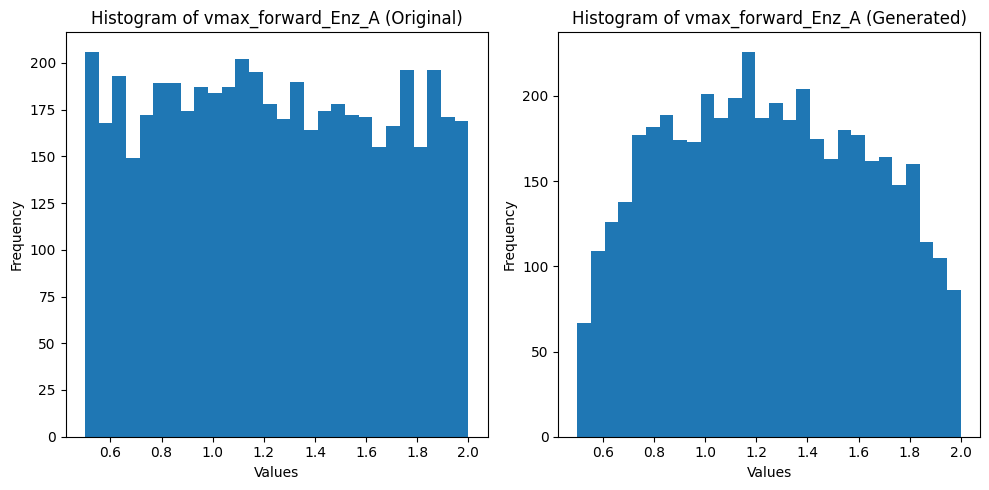

In [ ]:
# Calculate bin edges for both datasets
bin_edges = np.histogram_bin_edges(data_matrix[:, 0], bins=28)
# Apply the same bin edges to both histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data_matrix[:, 0], bins=bin_edges)
plt.title('Histogram of vmax_forward_Enz_A (Original)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(synthetic_samples[:, 0], bins=bin_edges)
plt.title('Histogram of vmax_forward_Enz_A (Generated)')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
pca_real = PCA(n_components=num_components, random_state=42)
real_result = pca_real.fit_transform(data_matrix)
pca_synthetic = PCA(n_components=num_components, random_state=42)
synthetic_result = pca_synthetic.fit_transform(synthetic_samples)

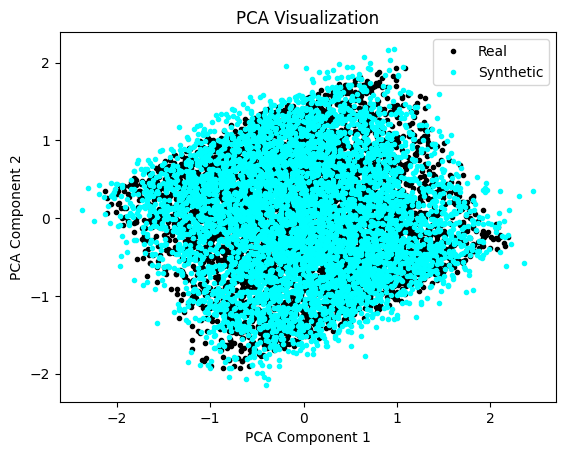

In [ ]:
plt.plot(real_result[:,0], real_result[:, 1],".", color='black')
plt.plot(synthetic_result[:5000,0], synthetic_result[:5000, 1],".", color='cyan')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.legend(['Real', 'Synthetic'])
plt.show()